<div align="center">
<img src="images/banco_de_portugal.png" alt="Banco de Portugal" width="250">
</div>

# Predicting Bank Telemarketing Sales

- Nick Gigliotti
- ndgigliotti@gmail.com

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-Bank-Telemarketing-Sales" data-toc-modified-id="Predicting-Bank-Telemarketing-Sales-1">Predicting Bank Telemarketing Sales</a></span></li><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-2">Business Problem</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-3">Dataset</a></span><ul class="toc-item"><li><span><a href="#Feature-Explanations" data-toc-modified-id="Feature-Explanations-3.1">Feature Explanations</a></span></li></ul></li><li><span><a href="#Initial-Cleaning" data-toc-modified-id="Initial-Cleaning-4">Initial Cleaning</a></span></li><li><span><a href="#Exploration" data-toc-modified-id="Exploration-5">Exploration</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-6">Modeling</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Modeling-Imports" data-toc-modified-id="Modeling-Imports-6.0.1">Modeling Imports</a></span></li><li><span><a href="#Train-test-Split" data-toc-modified-id="Train-test-Split-6.0.2">Train-test Split</a></span></li></ul></li><li><span><a href="#First-Model" data-toc-modified-id="First-Model-6.1">First Model</a></span><ul class="toc-item"><li><span><a href="#Baseline-Preprocessors" data-toc-modified-id="Baseline-Preprocessors-6.1.1">Baseline Preprocessors</a></span></li><li><span><a href="#Dummy-Model" data-toc-modified-id="Dummy-Model-6.1.2">Dummy Model</a></span></li><li><span><a href="#Baseline-Logistic-Regression" data-toc-modified-id="Baseline-Logistic-Regression-6.1.3">Baseline Logistic Regression</a></span></li></ul></li><li><span><a href="#Second-Model" data-toc-modified-id="Second-Model-6.2">Second Model</a></span><ul class="toc-item"><li><span><a href="#Balance-Class-Weight" data-toc-modified-id="Balance-Class-Weight-6.2.1">Balance Class Weight</a></span></li><li><span><a href="#Train-and-Test" data-toc-modified-id="Train-and-Test-6.2.2">Train and Test</a></span></li></ul></li><li><span><a href="#Third-Model" data-toc-modified-id="Third-Model-6.3">Third Model</a></span><ul class="toc-item"><li><span><a href="#Standard-Scaling" data-toc-modified-id="Standard-Scaling-6.3.1">Standard Scaling</a></span></li><li><span><a href="#Train-and-Test" data-toc-modified-id="Train-and-Test-6.3.2">Train and Test</a></span></li></ul></li><li><span><a href="#Fourth-Model" data-toc-modified-id="Fourth-Model-6.4">Fourth Model</a></span><ul class="toc-item"><li><span><a href="#Winsorize-before-Scaling" data-toc-modified-id="Winsorize-before-Scaling-6.4.1">Winsorize before Scaling</a></span></li><li><span><a href="#Train-and-Test" data-toc-modified-id="Train-and-Test-6.4.2">Train and Test</a></span></li></ul></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-6.5">Final Model</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-6.5.1">Hyperparameter Tuning</a></span></li><li><span><a href="#Train-and-Test" data-toc-modified-id="Train-and-Test-6.5.2">Train and Test</a></span></li><li><span><a href="#Retrain" data-toc-modified-id="Retrain-6.5.3">Retrain</a></span></li></ul></li></ul></li><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-7">Interpretation</a></span><ul class="toc-item"><li><span><a href="#Positive-Coefficients" data-toc-modified-id="Positive-Coefficients-7.1">Positive Coefficients</a></span></li><li><span><a href="#Negative-Coefficients" data-toc-modified-id="Negative-Coefficients-7.2">Negative Coefficients</a></span></li></ul></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-8">Recommendations</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-9">Future Work</a></span></li></ul></div>

# Business Problem

Banco de Portugal has asked me to create a model to help them predict which customers are likely to invest in term deposit accounts as a result of telemarketing. Telemarketing is, no doubt, very stressful and time-consuming work. Salespersons don't like to waste the time of customers, because it's a waste of their time too. Not only that, but dealing with uninterested customers is surely the ugliest part the job. How many times a day does a bank telemarketer have to put up with insults and rude remarks? On the other hand, salespersons who are stuck calling low-potential customers are likely to resort to aggressive, desperate, sales tactics. It's like trench warfare over the phone, and it needs to be made easier.

That's where machine learning comes into play, and in particular **logistic regression**. Logistic regression models are widely used because they offer a good combination of simplicity and predictive power. My goal is to create a strong predictive model which can predict investments based on data which can be realistically obtained in advance. Banco de Portugal will use my model to increase the efficency of their telemarketing efforts by discovering the customers with the highest probability of investing.


# Dataset
I train my predictive classifier on a Banco de Portugal telemarketing dataset which is publically available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). The data was collected between May 2008 and November 2010.

In [1]:
from distutils.util import strtobool
from functools import partial
from os.path import normpath

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import ticker

sns.set_theme(font_scale=1, style='darkgrid')
sns.set_palette("deep", desat=0.85, color_codes=True)
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
# My modules
from tools import cleaning, outliers, plotting, utils
from tools.modeling.classification import diagnostics

plt.rcParams.update(plotting.MPL_DEFAULTS)

There looks to be a mixture of categorical and numeric features. The feature labeled "y" is the target variable, namely whether or not the person invested in a term deposit.

In [3]:
df = pd.read_csv(normpath("data/bank-additional-full.csv"), sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


There are 21 features total and about 41k observations. About half of the features are "object" type, meaning that they're most likely categorical.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Yep, there are quite a few categorical variables. Even the numeric variables have strikingly few unique values for a dataset of 41k.

In [5]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

I rename some features to make them a little easier to interpret. Every variable prefixed with "contact" has to do with the last contact of the current campaign.

In [6]:
df.columns = df.columns.str.replace(".", "_", regex=False)
rename = {"y": "invested",
        "poutcome": "prev_outcome",
        "pdays": "days_since_prev",
        "previous": "prev_contact_count",
        "campaign": "contact_count",
        "month": "contact_month",
        "day_of_week": "contact_weekday",
        "duration": "contact_duration",
        "contact": "contact_type",
        "nr_employed": "n_employed",
        "euribor3m": "euribor_3m"}
df.rename(columns=rename, inplace=True)
del rename
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact_type', 'contact_month', 'contact_weekday', 'contact_duration',
       'contact_count', 'days_since_prev', 'prev_contact_count',
       'prev_outcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor_3m', 'n_employed', 'invested'],
      dtype='object')

## Feature Explanations
#### Client Information
   
1. 'age' - years
2. 'job' - type of job
3. 'marital' - marital status
4. 'education' - level of education
5. 'default' - has defaulted on credit
6. 'housing' - has housing loan
7. 'loan' - has personal loan

#### Current Campaign

8. 'contact_type' - call type of **last contact** (cellular or landline)
9. 'contact_month' - month of **last contact**
10. 'contact_weekday' - weekday of **last contact**
11. 'contact_duration' - duration of **last contact** in seconds
12. 'contact_count' - total number of contacts during this campaign
13. 'invested' - invested in a term deposit (target variable)

>A term deposit is a short-term investment which typically matures within a few months or years.

#### Previous Campaigns

14. 'days_since_prev' - number of days since last contacted during previous campaign
15. 'prev_contact_count' - total number of contacts before this campaign
16. 'prev_outcome' - sales result of previous campaign

#### Economic Context

17. 'emp_var_rate' - employment variation rate (quarterly indicator)
18. 'cons_price_idx' - consumer price index (monthly indicator)
19. 'cons_conf_idx' - consumer confidence index (monthly indicator)
20. 'euribor_3m' - euribor 3 month rate (daily indicator)
21. 'n_employed' - thousands of people employed (quarterly indicator)

# Initial Cleaning

I do some preliminary tidying up and reorganization but leave most of the preprocessing for the modeling section. Using Sklearn's preprocessing pipelines allows the preprocessors and their parameters to be adjusted alongside the model itself.

I begin by replacing some placeholders with NaN and surveying the missing values and duplicates. There are 12 duplicate rows&mdash;an easy number to drop.

In [7]:
df["days_since_prev"].replace(999, np.NaN, inplace=True)
df.replace(["unknown", "nonexistent"], np.NaN, inplace=True)
cleaning.info(df)

,nan,nan_%,uniq,uniq_%,dup,dup_%
days_since_prev,39673,96.32,26,0.06,12,0.03
prev_outcome,35563,86.34,2,0.00,12,0.03
default,8597,20.87,2,0.00,12,0.03
education,1731,4.20,7,0.02,12,0.03
housing,990,2.40,2,0.00,12,0.03
loan,990,2.40,2,0.00,12,0.03
job,330,0.80,11,0.03,12,0.03
marital,80,0.19,3,0.01,12,0.03
age,0,0.00,78,0.19,12,0.03
n_employed,0,0.00,11,0.03,12,0.03


I drop the duplicate rows.

In [8]:
display(df.loc[df.duplicated()])
df.drop_duplicates(inplace=True)

,age,job,marital,education,default,housing,loan,contact_type,contact_month,contact_weekday,...,contact_count,days_since_prev,prev_contact_count,prev_outcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,n_employed,invested
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,NaN,0,NaN,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,NaN,no,no,no,telephone,jul,thu,...,1,NaN,0,NaN,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,NaN,0,NaN,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,NaN,0,NaN,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,NaN,0,NaN,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,NaN,no,no,cellular,aug,mon,...,1,NaN,0,NaN,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,NaN,0,NaN,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,NaN,0,NaN,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,NaN,0,NaN,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,NaN,0,NaN,-1.8,92.893,-46.2,1.313,5099.1,no


Now I survey the uniques to see how I should process the categorical variables.

In [9]:
cleaning.show_uniques(df, cut=20)

job,marital,education,default,housing,loan,contact_type,contact_month,contact_weekday,prev_contact_count,prev_outcome,emp_var_rate,n_employed,invested
housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.0,failure,1.1,5191.0,no
services,single,high.school,yes,yes,yes,cellular,jun,tue,1.0,success,1.4,5228.1,yes
admin.,divorced,basic.6y,,,,,jul,wed,2.0,,-0.1,5195.8,
blue-collar,,basic.9y,,,,,aug,thu,3.0,,-0.2,5176.3,
technician,,professional.course,,,,,oct,fri,4.0,,-1.8,5099.1,
retired,,university.degree,,,,,nov,,5.0,,-2.9,5076.2,
management,,illiterate,,,,,dec,,6.0,,-3.4,5017.5,
unemployed,,,,,,,mar,,7.0,,-3.0,5023.5,
self-employed,,,,,,,apr,,,,-1.7,5008.7,
entrepreneur,,,,,,,sep,,,,-1.1,4991.6,


Doesn't look like there are any interesting patterns with the missing values. It's striking how empty 'days_since_prev' is, and that it doesn't match up with 'prev_outcome'.

<AxesSubplot:>

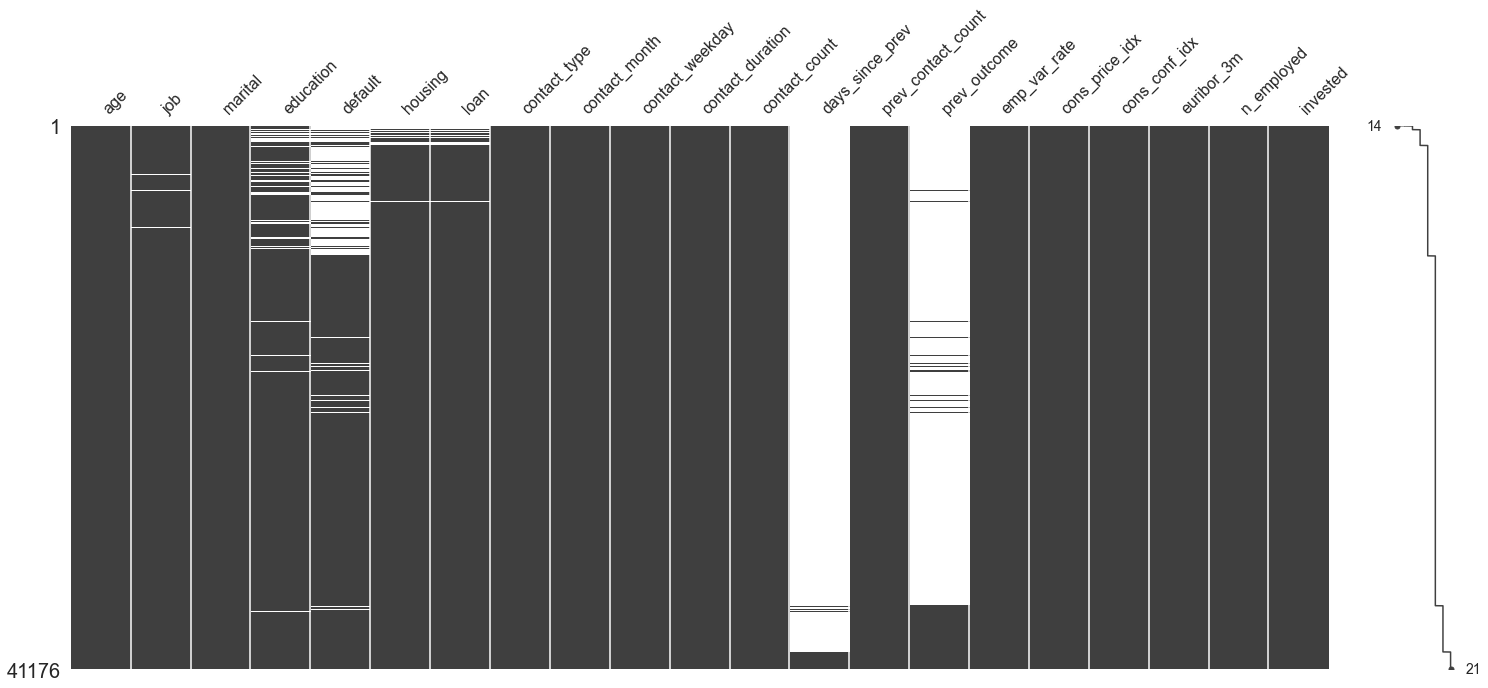

In [10]:
msno.matrix(df, sort="ascending")

I go ahead and encode 'invested' as numeric for convenience. It's the prediction target and I'll need to make calculations for EDA. The classes are imbalanced, which is a problem I'll have to deal with in the modeling phase.

In [11]:
df["invested"] = (df["invested"] == "yes").astype(np.float64)
df["invested"].value_counts(normalize=True)

0.0    0.887337
1.0    0.112663
Name: invested, dtype: float64

I one-hot encode 'prev_outcome' and implicitly drop the null category. This eliminates a lot of null values and avoids multicollinearity at the same time.
    
Nevertheless, the categories are wildly uneven. It isn't the target variable, but it still isn't good. Most of the customers in the dataset weren't contacted during a previous campaign, so those who were are a rare minority.

In [12]:
df = df.join(pd.get_dummies(df["prev_outcome"], prefix="prev"))

df[["prev_failure", "prev_success"]].value_counts(normalize=True)

prev_failure  prev_success
0             0               0.863391
1             0               0.103264
0             1               0.033345
dtype: float64

One week seems like a good cutoff for turning "days_since_prev" into a categorical. The third quartile is exactly 7 days.

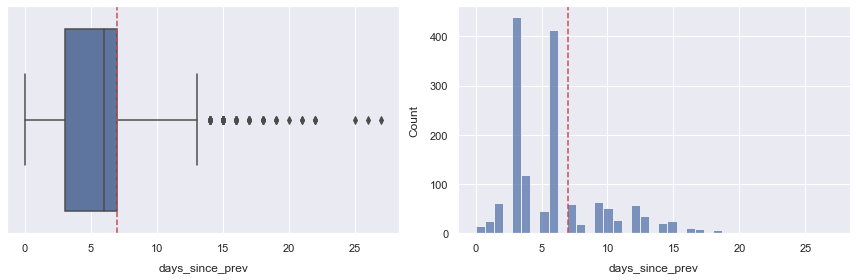

In [13]:
# make subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

# plot boxplot and hist
sns.boxplot(data=df, x="days_since_prev", ax=ax1)
sns.histplot(data=df, x="days_since_prev", ax=ax2)

# add line at 7 days
for ax in [ax1, ax2]:
    ax.axvline(7, c="r", ls="--")
    
fig.tight_layout()

# mop up for performance
del fig, ax1, ax2

I create a "recent_prev_contact" feature to replace the "days_since_prev" feature with 96% nulls. I let the nulls go False, although now the categories are just wildly uneven.

In [14]:
df["recent_prev_contact"] = df["days_since_prev"] <= 7
df["recent_prev_contact"].value_counts(1)

False    0.971415
True     0.028585
Name: recent_prev_contact, dtype: float64

I turn "prev_contact_count" into a binary categorical because values over 1 are ruled outliers by the z-score and Tukey fence methods. A 90% Winsorization results in a nice clean binary feature. The new feature simply indicates whether or not the customer was contacted during a previous campaign.

,n_winsorized,pct_winsorized
prev_contact_count,1064,2.58403
total_obs,1064,2.58403


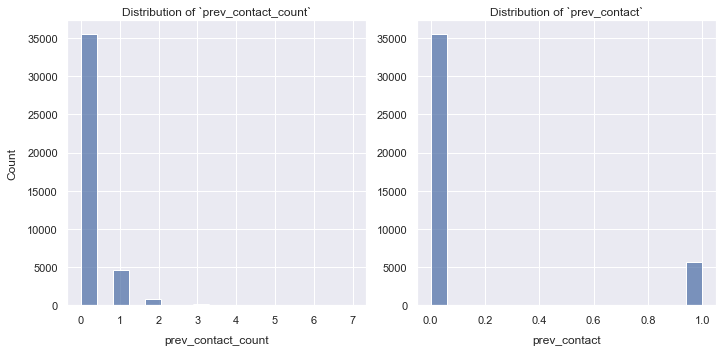

In [15]:
# squeeze values to central 90%
df["prev_contact"] = outliers.quantile_winsorize(
    df["prev_contact_count"], inner=0.9)

plotting.multi_dist(data=df[["prev_contact_count", "prev_contact"]]);

I convert the binary "contact_type" feature to a boolean feature "contact_cellular". Again, every variable with the "contact" prefix has to do with the last contact of the current campaign.

In [16]:
df["contact_cellular"] = df["contact_type"] == "cellular"
df["contact_cellular"].value_counts()

True     26135
False    15041
Name: contact_cellular, dtype: int64

I drop the features which I've redesigned.

In [17]:
to_drop = ["prev_outcome", "days_since_prev",
           "prev_contact_count", "contact_type"]
df.drop(to_drop, axis=1, inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact_month', 'contact_weekday', 'contact_duration', 'contact_count',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor_3m',
       'n_employed', 'invested', 'prev_failure', 'prev_success',
       'recent_prev_contact', 'prev_contact', 'contact_cellular'],
      dtype='object')

I go ahead and numerically encode these binary string categoricals, preserving NaNs.

In [18]:
string_cols = ["default", "housing", "loan"]
df[string_cols] = df[string_cols].applymap(strtobool, "ignore")
cleaning.show_uniques(df, columns=string_cols)
del string_cols

default,housing,loan
0.0,0.0,0.0
1.0,1.0,1.0


For now I will hold off on converting these binary variables to categorical dtype. It will be easier to work with them as numeric variables, since they don't need to be one-hot encoded.

In [19]:
binary_cats = utils.binary_cols(df)
df[binary_cats] = df[binary_cats].astype(np.float64)
cleaning.show_uniques(df, columns=binary_cats)

default,housing,loan,invested,prev_failure,prev_success,recent_prev_contact,prev_contact,contact_cellular
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Looks like most of the binary categoricals are imbalanced. By far the worst is 'default'.

In [20]:
cleaning.token_info(df[binary_cats], normalize=True)

,min_tokens,max_tokens,types
default,0.000092,0.999908,2.0
recent_prev_contact,0.028585,0.971415,2.0
prev_success,0.033345,0.966655,2.0
prev_failure,0.103264,0.896736,2.0
invested,0.112663,0.887337,2.0
prev_contact,0.136609,0.863391,2.0
loan,0.155477,0.844523,2.0
contact_cellular,0.365286,0.634714,2.0
housing,0.463221,0.536779,2.0


 I drop the most extremely uneven binary category: 'default'. It has almost no True values, and these are essentially outliers. I'm not interested in the rare clients who have defaulted on credit or a loan.

In [21]:
df.drop(columns=["default"], inplace=True)
del binary_cats
cleaning.token_info(df.loc[:, df.nunique() == 2], normalize=True)

,min_tokens,max_tokens,types
recent_prev_contact,0.028585,0.971415,2.0
prev_success,0.033345,0.966655,2.0
prev_failure,0.103264,0.896736,2.0
invested,0.112663,0.887337,2.0
prev_contact,0.136609,0.863391,2.0
loan,0.155477,0.844523,2.0
contact_cellular,0.365286,0.634714,2.0
housing,0.463221,0.536779,2.0


I tidy up the labels for variables with 2+ categories.

In [22]:
multi_cat = ["job", "marital", "education",
             "contact_month", "contact_weekday"]

# tweak some labels
df["job"] = df["job"].str.replace(".", "", regex=False)
df["job"] = df["job"].str.replace("-", "_", regex=False)
df["education"] = df["education"].str.replace(".", "_", regex=False)

# convert to unordered categoricals
df[multi_cat] = df[multi_cat].astype("category")


cleaning.show_uniques(df, columns=multi_cat)

job,marital,education,contact_month,contact_weekday
housemaid,married,basic_4y,may,mon
services,single,high_school,jun,tue
admin,divorced,basic_6y,jul,wed
blue_collar,,basic_9y,aug,thu
technician,,professional_course,oct,fri
retired,,university_degree,nov,
management,,illiterate,dec,
unemployed,,,mar,
self_employed,,,apr,
entrepreneur,,,sep,


The distributions look serviceable, but there are a couple extremely thin categories (under 1%): "dec" and "illiterate".

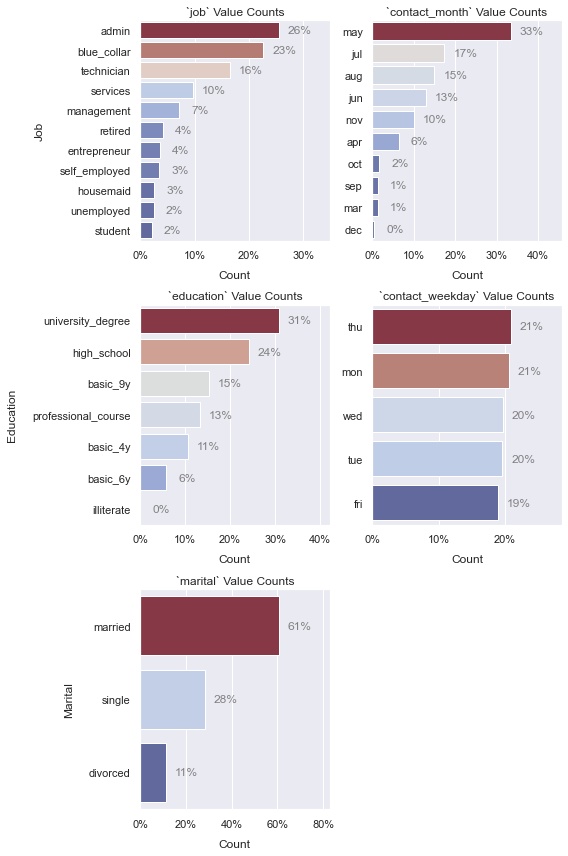

In [23]:
plotting.multi_countplot(data=df[multi_cat],
                         normalize=True,
                         ncols=2,
                         height=4)
del multi_cat

I drop the extremely thin "illiterate" and "dec" classes. With too few examples to accurately represent a real pattern, these will likely just add noise to the model. Plus illiterate people are a just a rare minority to begin with, and not really of any interest. Perhaps if this were a Hooked on Phonics™ dataset...

In [24]:
# compute rows to keep
keep = (df.education != "illiterate") & (df.contact_month != "dec")

# overwrite `df` with keeper rows
df = df.loc[keep].copy()

# drop unused categories
df["education"] = df["education"].cat.remove_unused_categories()
df["contact_month"] = df["contact_month"].cat.remove_unused_categories()

# view results
print(f"Dropped {(~keep).sum()} observations.")
del keep
cleaning.token_info(df[["education", "contact_month"]], normalize=True)

Dropped 200 observations.


,min_tokens,max_tokens,types
contact_month,0.013325,0.335904,9.0
education,0.058355,0.308049,6.0


I order the weekdays and months for plotting purposes.

In [25]:
# define order
days = ["mon", "tue", "wed", "thu", "fri"]
months = ["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov"]

# convert to ordered categories
df["contact_weekday"].cat.reorder_categories(days, ordered=True, inplace=True)
df["contact_month"].cat.reorder_categories(months, ordered=True, inplace=True)

# mop up temp variables
del days, months

display(df["contact_weekday"].cat.categories)
display(df["contact_month"].cat.categories)

Index(['mon', 'tue', 'wed', 'thu', 'fri'], dtype='object')

Index(['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov'], dtype='object')

# Exploration

Here are correlations between numeric/boolean variables and the target. As stated in the description on the [UCI page](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing), 'contact_duration' has a strong relationship with 'invested'. I will ignore this feature later on, because it's not information which could be obtained in advance.

Unsurprisingly, 'prev_success' and 'recent_prev_contact' have strong relationships with the target. Strangely, 'n_employed' has a negative relationship with the target, meaning that people tend to invest when fewer people are employed.

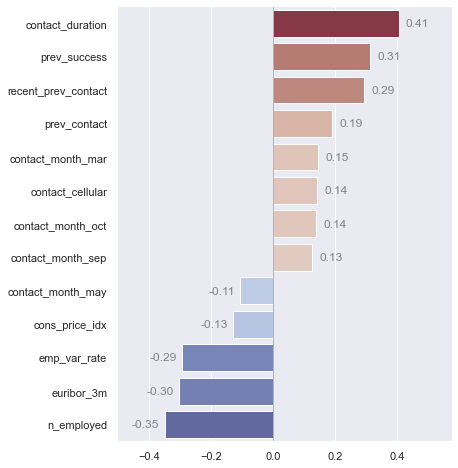

In [26]:
inv_corr = pd.get_dummies(df.drop(columns="invested"))
inv_corr = inv_corr.corrwith(df["invested"])
inv_corr = inv_corr.loc[inv_corr.abs() > .1]
ax = plotting.heated_barplot(data=inv_corr)
plotting.annot_bars(ax)
del inv_corr

<AxesSubplot:title={'center':'Correlations Between Features'}>

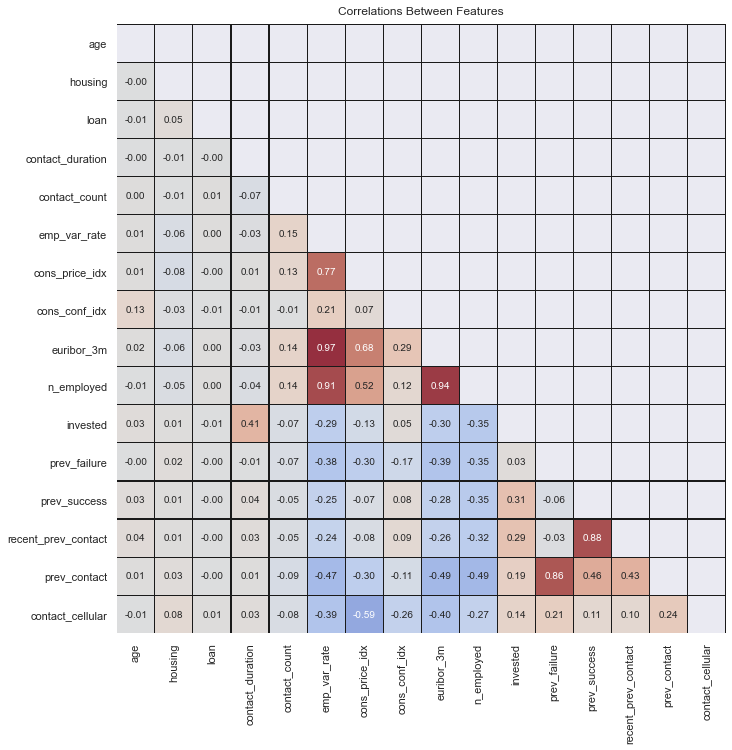

In [27]:
plotting.pair_corr_heatmap(data=df, scale=.7)

<AxesSubplot:title={'center':'Correlation with Numeric Features'}, xlabel='Numeric Features', ylabel='Categorical Features'>

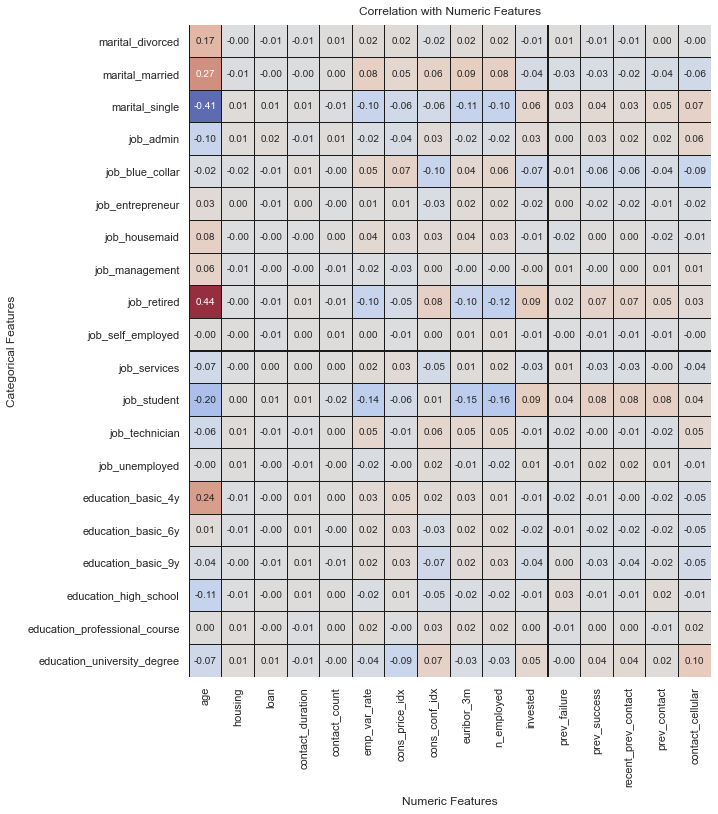

In [28]:
plotting.cat_corr_heatmap(data=df,
                          categorical=["marital", "job", "education"],
                          scale=.6,
                          fmt=".2f")

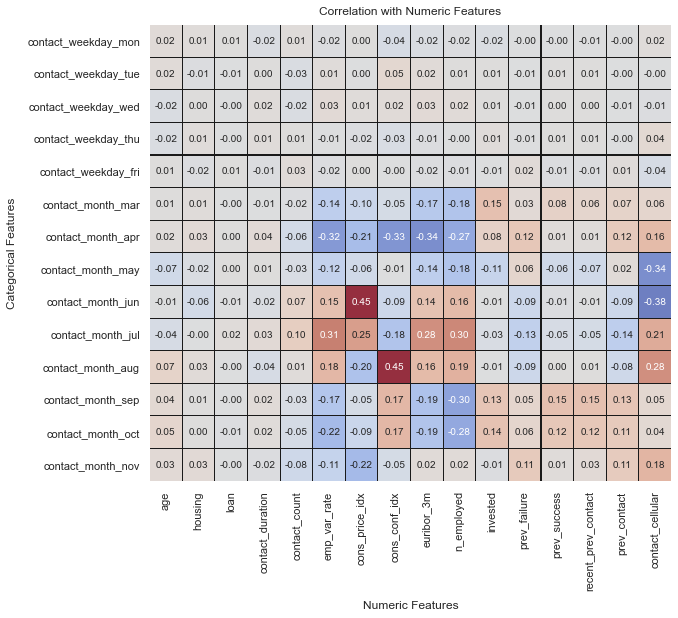

In [29]:
temporal = ["contact_weekday", "contact_month"]
plotting.cat_corr_heatmap(data=df, categorical=temporal, scale=.6, fmt=".2f")
del temporal

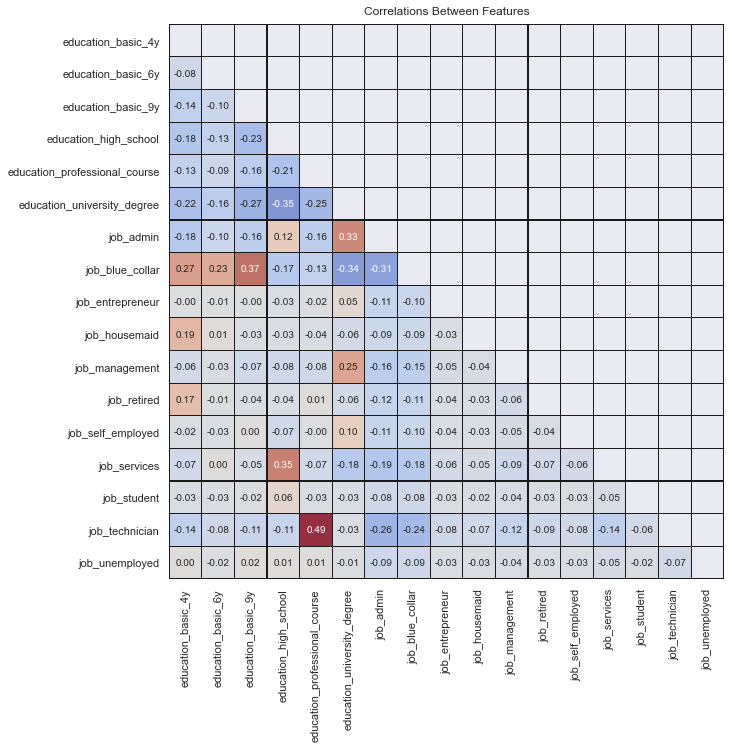

In [30]:
dummies = pd.get_dummies(df[["education", "job"]])
plotting.pair_corr_heatmap(data=dummies, scale=.6, fmt=".2f")
del dummies

[Text(0.5, 1.0, 'Conversion Rate by Month'),
 Text(0, 0.5, 'Conversion Rate'),
 Text(0.5, 0, 'Month')]

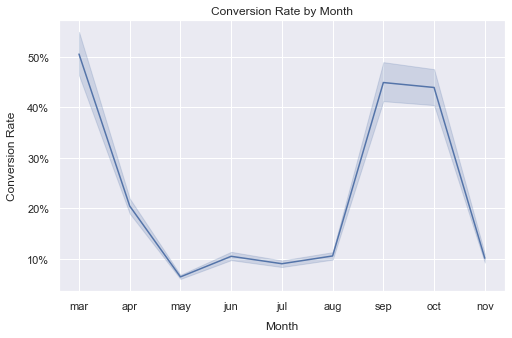

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=df, x="contact_month", y="invested", ax=ax)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.set(title="Conversion Rate by Month", ylabel="Conversion Rate", xlabel="Month")

Text(0, 0.5, 'Conversion Rate')

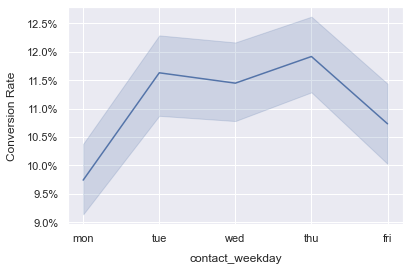

In [32]:
ax = sns.lineplot(data=df, x="contact_weekday", y="invested")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax.set_ylabel("Conversion Rate")

In [33]:
def conversion_bars(*, data, y,  x="invested", **kwargs):
    """Draw mirror plot of sales counts and conversion rates."""
    
    # Format strings for pretty titles
    x, y = utils.to_title(x), utils.to_title(y)
    data = utils.title_mode(data)
    
    # Plot mirror plot
    fig = plotting.mirror_plot(data=data, x=x, y=y, **kwargs)
    
    # Format tick labels
    ax2, ax1 = fig.get_axes()
    ax1.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
    ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
    
    # Label axes
    ax1.set(xlabel="Conversion Rate",
            ylabel=None,
            title=f"Conversion Rate by {y}")
    ax2.set(xlabel="Number of Sales",
            ylabel=y,
            title=f"Number of Sales by {y}")
    
    return fig

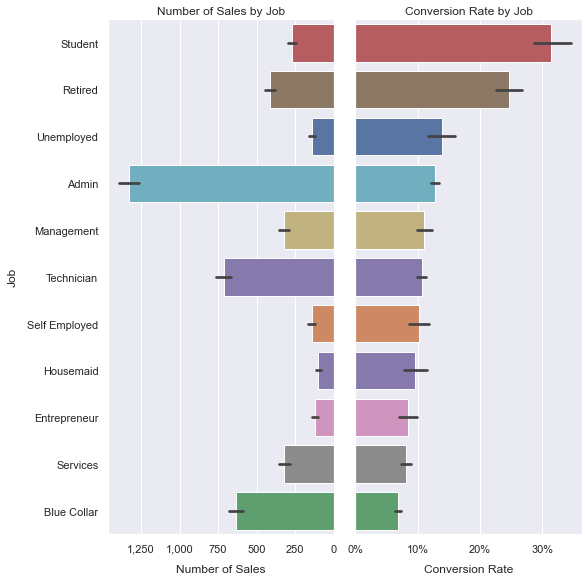

In [34]:
conversion_bars(data=df, y="job", size=(4,8));

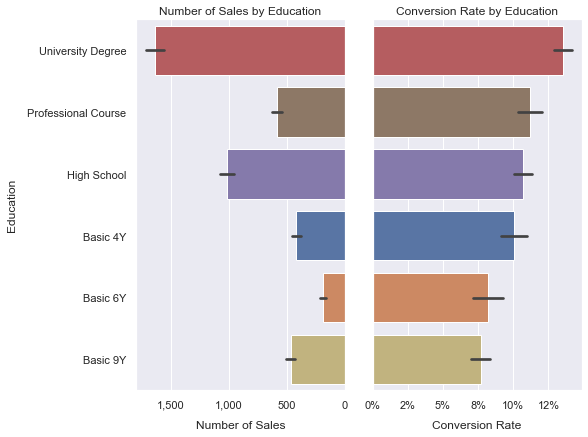

In [35]:
conversion_bars(data=df, x="invested", y="education", size=(4, 6));

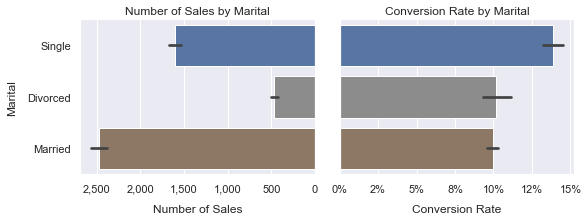

In [36]:
conversion_bars(data=df, y="marital", size=(4, 3));

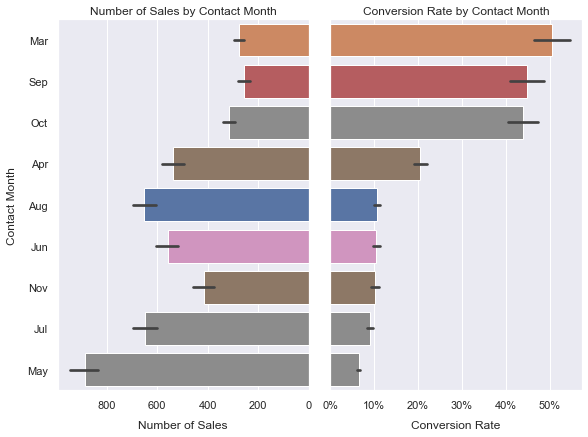

In [37]:
conversion_bars(data=df, y="contact_month", size=(4, 6));

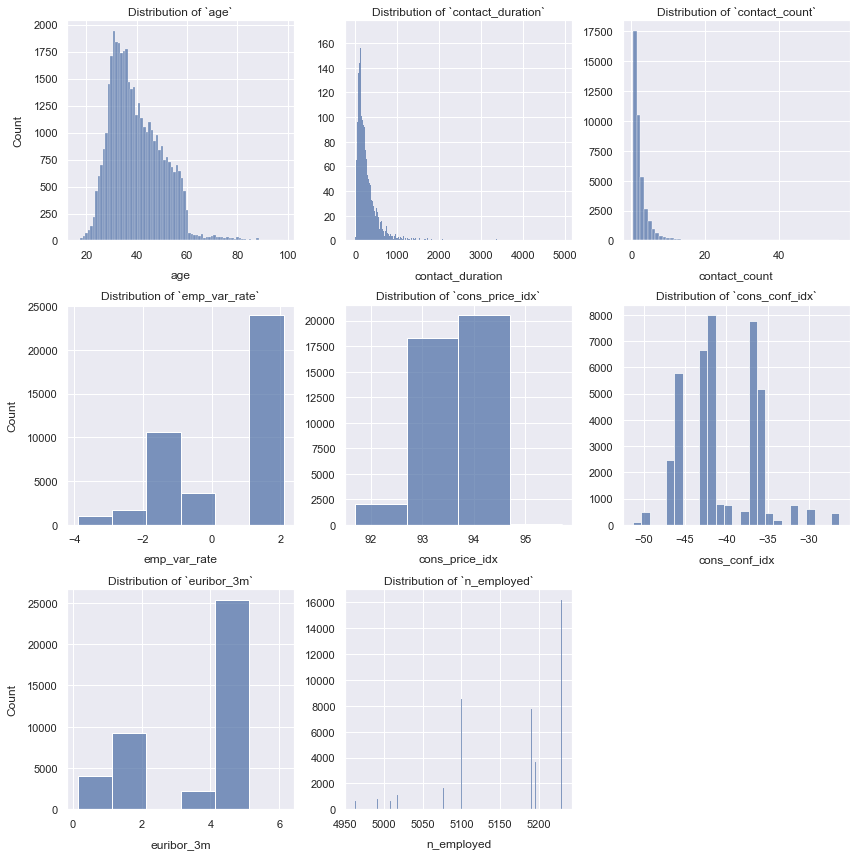

In [38]:
plotting.multi_dist(data=df[utils.true_numeric_cols(df)],
                    discrete=True,
                    height=4);

<AxesSubplot:xlabel='n_employed', ylabel='invested'>

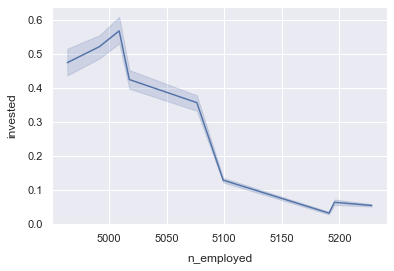

In [39]:
sns.lineplot(data=df, x="n_employed", y="invested")

# Modeling
### Modeling Imports

In [40]:
import joblib
from feature_engine.outliers import Winsorizer
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.base import clone
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (GridSearchCV, RepeatedKFold,
                                     train_test_split)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

My classes/modules:

In [41]:
from tools.modeling.preprocessing import DummyEncoder
from tools.modeling import selection

### Train-test Split
I begin my iterative modeling process by performing a train-test split.

I drop "contact_duration", because as noted in on the [UCI Repo](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) for this dataset, it reduces the practical value of the model. This was the duration of the last call, after which the broker knew whether or not the customer invested. The duration of the final call wouldn't be known prior to the final call. Since this is not data that Banco de Portugal would have to **plug into** my predictive model, so there's no point in including it. It does, however, make me sad to exclude it, because it radically improves the performance of the model.

In [42]:
# drop NaNs and irrelevant columns
X = df.drop(columns=["invested", "contact_duration"])

# drop NaNs and slice target column
y = df["invested"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30732, 19), (10244, 19), (30732,), (10244,))

## First Model

For my baseline model, I apply minimal preprocessing to the data.

### Baseline Preprocessors

#### DummyEncoder
I one-hot encode the categorical variables using `DummyEncoder`, which is my wrapper for `pd.get_dummies`. It conveniently stores all the feature names, unlike the scikit `OneHotEncoder`.

#### SmartCorrelatedSelection
I use a feature selection tool which detects highly correlated sets of features and then drops all of them except one, which it chooses intelligently. The purpose is to avoid multi-collinearity, which is a potential problem in logistic regression. If features are highly inter-correlated, the model may have trouble distinguishing between their individual influences, and the coefficients may be distorted. I have it set to keep the feature with the highest variance, which is a simple, fast, and reasonably effective strategy.

#### SimpleImputer
Due to my data cleaning efforts, there are not very many missing values left in the dataset. The missing values for multi-category categorical variables like 'education', 'job', and 'marital' will turn to 0.0 (i.e. False) during one-hot encoding. There is not really a more sophisticated way to handle those, except perhaps filling with mode. Since I have already rendered other missing categorical values as 0.0, as when I created 'prev_failure' and 'prev_success', I continue this policy here. I use `SimpleImputer` to fill missing values with 0.0 in the remaining two binary categoricals, 'housing' and 'loan'. This is equivalent to filling with mode, because the mode is 0.0 for both of those. The advantage of using`SimpleImputer` is speed and (in this case) consistency.

In [43]:
cleaning.info(df).head(6).style.bar(subset=["nan"])

,nan,nan_%,uniq,uniq_%,dup,dup_%
education,1716,4.190000,6,0.010000,2,0.000000
housing,984,2.400000,2,0.000000,2,0.000000
loan,984,2.400000,2,0.000000,2,0.000000
job,328,0.800000,11,0.030000,2,0.000000
marital,80,0.200000,3,0.010000,2,0.000000
age,0,0.000000,78,0.190000,2,0.000000


In [44]:
classifier_pipe = Pipeline([
    ("cat_encoder", DummyEncoder(drop_first=True)),
    ("corr_trimmer", SmartCorrelatedSelection(selection_method="variance")),
    ("imputer", SimpleImputer(strategy="constant", fill_value=0.0)),
    ("classifier", DummyClassifier())
])

classifier_pipe

Pipeline(steps=[('cat_encoder', DummyEncoder(drop_first=True)),
                ('corr_trimmer',
                 SmartCorrelatedSelection(selection_method='variance')),
                ('imputer', SimpleImputer(fill_value=0.0, strategy='constant')),
                ('classifier', DummyClassifier())])

### Dummy Model
I create a dummy model which always predicts the most frequent class (0.0, in this case). It's good to ensure that my models are better than an extremely dumb alternative. If the dummy model is good at all, it's due to pure luck.

I train the model on all features except the target.

The confusion matrix indicates that the dummy gets 100% of the true negatives and 0% of the true positives, which is pretty bad.

The ROC curve is not even a curve, because if falls directly on the 1:1 line, with 0.5 AUC. The Precision-Recall Curve is a right angle. The balanced accuracy score is exactly 0.5.

,0.0,1.0,macro avg,weighted avg,accuracy,bal accuracy
precision,0.891,0.000,0.446,0.794,0.891,0.500
recall,1.000,0.000,0.500,0.891,,
f1-score,0.942,0.000,0.471,0.840,,
support,0.891,0.109,,,,


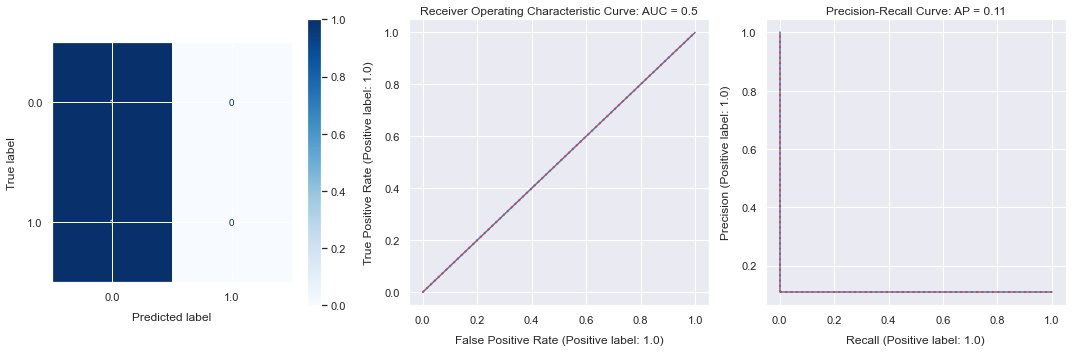

In [45]:
classifier_pipe["classifier"].set_params(strategy="most_frequent")
classifier_pipe.fit(X_train, y_train)
diagnostics.standard_report(classifier_pipe, X_test, y_test, zero_division=0)

### Baseline Logistic Regression

Since I haven't scaled the data yet, I set the solver to "lbfgs". The faster solver, "saga", is only fast on scaled data.

In [46]:
logit = LogisticRegression(fit_intercept=False,
                           penalty="none",
                           multi_class="ovr",
                           max_iter=1e4,
                           warm_start=False,
                           solver="lbfgs")
logit

LogisticRegression(fit_intercept=False, max_iter=10000.0, multi_class='ovr',
                   penalty='none')

It's better than the dummy, but not that much. Notice that the predictions are very biased towards the negative. The positive recall is terrible, and that will be the most important thing to fix. Ultimately, I want to see a confusion matrix with a strong diagonal. Going forward I will prioritize Average Precision (related to the area under the Precision-Recall Curve on the right) over AUC, as it is a better metric for finding balance with imbalanced data.

,0.0,1.0,macro avg,weighted avg,accuracy,bal accuracy
precision,0.912,0.595,0.754,0.877,0.899,0.603
recall,0.981,0.224,0.603,0.899,,
f1-score,0.945,0.326,0.636,0.878,,
support,0.891,0.109,,,,


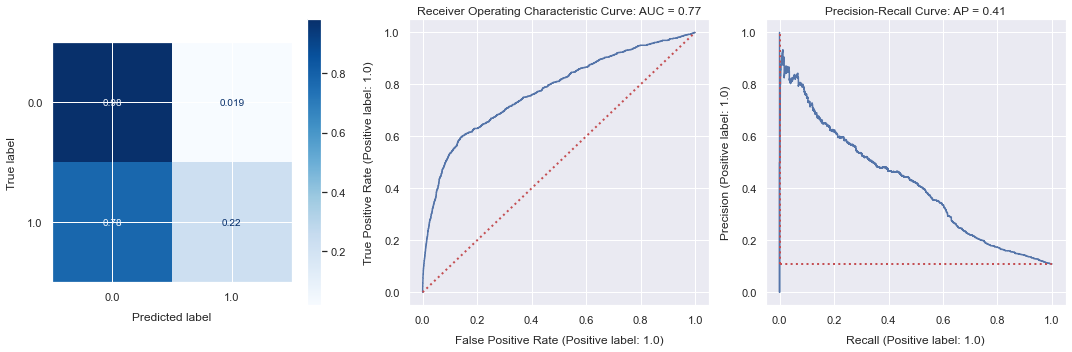

In [47]:
classifier_pipe.set_params(classifier=logit)
classifier_pipe.fit(X_train, y_train)
diagnostics.standard_report(classifier_pipe, X_test, y_test)

These are the features that were dropped because of multi-collinearity concerns. The SmartCorrelatedSelection device kept "n_employed", "prev_contact", and "n_employed". Based on what I know from the earlier plot of correlations, these are indeed smart choices, as they have the strongest effect on the target.

In [48]:
print("correlated feature sets:")
display(classifier_pipe["corr_trimmer"].correlated_feature_sets_)
print("dropped:")
classifier_pipe["corr_trimmer"].features_to_drop_

correlated feature sets:


[{'emp_var_rate', 'euribor_3m', 'n_employed'},
 {'prev_contact', 'prev_failure'},
 {'prev_success', 'recent_prev_contact'}]

dropped:


['emp_var_rate', 'euribor_3m', 'prev_failure', 'recent_prev_contact']

## Second Model
### Balance Class Weight
My classes are very imbalanced with an almost 9:1 ratio. Fortunately the `LogisticRegression` estimator has a setting to automatically assign the classes balanced weights that are inversely proportional to their prevalence or "support". This is probably the single most important change that needs to be made to improve the model.

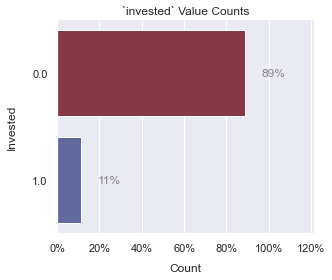

In [49]:
fig = plotting.multi_countplot(data=y.to_frame(),
                               normalize=True,
                               orient="h",
                               height=4)


In [50]:
logit.set_params(class_weight="balanced")
classifier_pipe

Pipeline(steps=[('cat_encoder', DummyEncoder(drop_first=True)),
                ('corr_trimmer',
                 SmartCorrelatedSelection(selection_method='variance',
                                          variables=['age', 'housing', 'loan',
                                                     'contact_count',
                                                     'emp_var_rate',
                                                     'cons_price_idx',
                                                     'cons_conf_idx',
                                                     'euribor_3m', 'n_employed',
                                                     'prev_failure',
                                                     'prev_success',
                                                     'recent_prev_contact',
                                                     'prev_contact',
                                                     'contact_cellular',
                                    

### Train and Test
The positive recall has gone from 0.2 to 0.6, a major improvement. Now the model is actually useful, since it might actually predict an investor.

,0.0,1.0,macro avg,weighted avg,accuracy,bal accuracy
precision,0.947,0.323,0.635,0.879,0.818,0.728
recall,0.843,0.613,0.728,0.818,,
f1-score,0.892,0.423,0.657,0.841,,
support,0.891,0.109,,,,


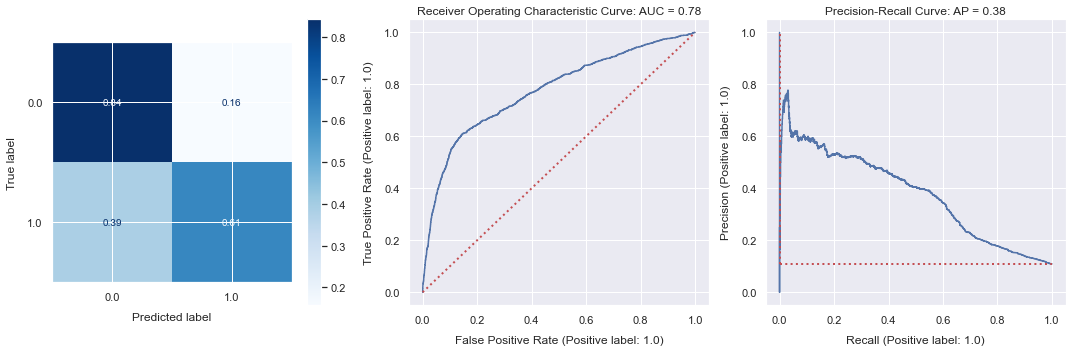

In [51]:
classifier_pipe.fit(X_train, y_train)
diagnostics.standard_report(classifier_pipe, X_test, y_test)

## Third Model
### Standard Scaling
I scale the data with `StandardScaler`, which centers on the mean and scales to standard deviation. This works on both categorical and numeric variables, since categorical variables are encoded as binary floats early on. `RobustScaler` would be a reasonable alternative, but centering on the median would radically skew the distributions of binary-encoded categorical variables.

In [52]:
classifier_pipe = Pipeline([
    ("cat_encoder", DummyEncoder(drop_first=True)),
    ("corr_trimmer", SmartCorrelatedSelection(selection_method="variance")),
    ("scaler", StandardScaler()),
    ("imputer", SimpleImputer()),
    ("classifier", logit),
])
logit.set_params(solver="saga", penalty="none", C=1, max_iter=1e3)
classifier_pipe

Pipeline(steps=[('cat_encoder', DummyEncoder(drop_first=True)),
                ('corr_trimmer',
                 SmartCorrelatedSelection(selection_method='variance')),
                ('scaler', StandardScaler()), ('imputer', SimpleImputer()),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced',
                                    fit_intercept=False, max_iter=1000.0,
                                    multi_class='ovr', penalty='none',
                                    solver='saga'))])

### Train and Test
It's a major improvement. Positive recall is just under 0.7 now. The AP score has gone up significantly as well.

,0.0,1.0,macro avg,weighted avg,accuracy,bal accuracy
precision,0.953,0.256,0.604,0.877,0.746,0.724
recall,0.753,0.695,0.724,0.746,,
f1-score,0.841,0.374,0.607,0.790,,
support,0.891,0.109,,,,


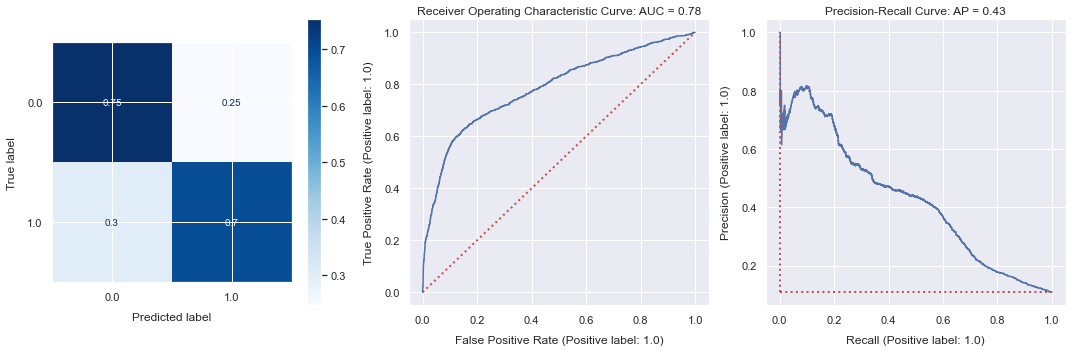

In [53]:
logit.set_params(warm_start=False)
classifier_pipe.fit(X_train, y_train)
diagnostics.standard_report(classifier_pipe, X_test, y_test)

## Fourth Model
### Winsorize before Scaling
Since my distributions are variously skewed and non-normal, I Winsorize them at 95% in order to reduce the influence of outliers on each distribution's mean and make them more suitable for `StandardScaler`.

In [54]:
winsorizer = Winsorizer(variables=utils.true_numeric_cols(X),
                        capping_method="quantiles",
                        tail="both",
                        fold=0.05)

In [55]:
classifier_pipe = Pipeline([
    ("cat_encoder", DummyEncoder(drop_first=True)),
    ("winsorizer", winsorizer),
    ("corr_trimmer", SmartCorrelatedSelection(selection_method="variance")),
    ("scaler", StandardScaler()),
    ("imputer", SimpleImputer()),
    ("classifier", logit),
])
logit.set_params(penalty="none", C=1)
classifier_pipe

Pipeline(steps=[('cat_encoder', DummyEncoder(drop_first=True)),
                ('winsorizer',
                 Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
                            variables=['age', 'contact_count', 'emp_var_rate',
                                       'cons_price_idx', 'cons_conf_idx',
                                       'euribor_3m', 'n_employed'])),
                ('corr_trimmer',
                 SmartCorrelatedSelection(selection_method='variance')),
                ('scaler', StandardScaler()), ('imputer', SimpleImputer()),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced',
                                    fit_intercept=False, max_iter=1000.0,
                                    multi_class='ovr', penalty='none',
                                    solver='saga'))])

To Winsorize a distribution at 95% is to clip it to the outermost values between the 2.5th and 97.5th percentiles. As you can see from the examples below, this means moving far-out data points to new locations within the inner 95% range.

,n_winsorized,pct_winsorized
age,1461,3.565502
contact_count,869,2.120754
total_obs,2318,5.656970


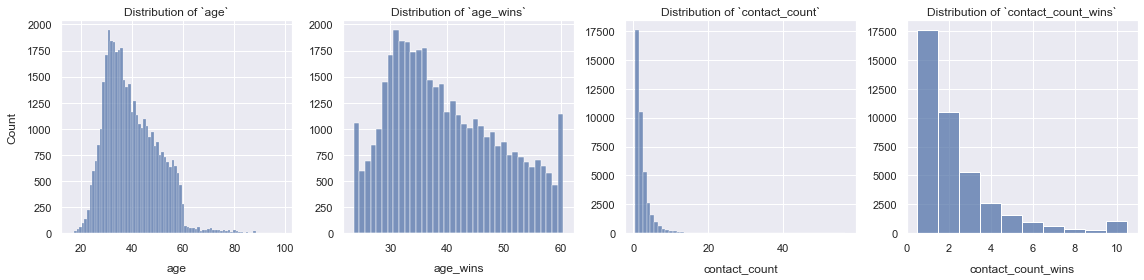

In [56]:
examples = df[["age", "contact_count"]]
win_examples = outliers.quantile_winsorize(examples, inner=.95)
examples = examples.join(win_examples, rsuffix="_wins").sort_index(axis=1)

fig = plotting.multi_dist(data=examples, ncols=4, discrete=True, height=4);
fig.tight_layout()
del fig, examples, win_examples

### Train and Test
The Winsorization slightly increases the recall, weighted f1-score, and balanced accuracy, but doesn't make a huge difference overall. At the very least, it makes me more comfortable using `StandardScalar`, because outliers and skewness will have less of an effect on the means.

,0.0,1.0,macro avg,weighted avg,accuracy,bal accuracy
precision,0.953,0.257,0.605,0.877,0.748,0.725
recall,0.755,0.695,0.725,0.748,,
f1-score,0.842,0.375,0.609,0.792,,
support,0.891,0.109,,,,


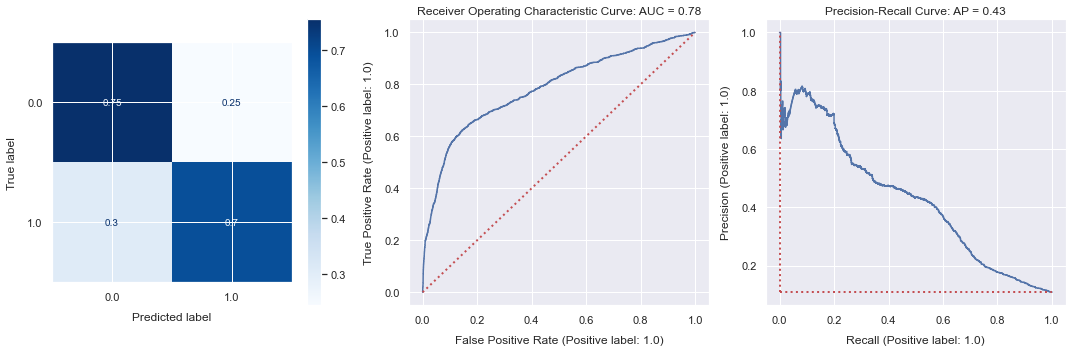

In [57]:
classifier_pipe["winsorizer"].set_params(fold=0.05)
classifier_pipe.fit(X_train, y_train)
diagnostics.standard_report(classifier_pipe, X_test, y_test)

## Final Model
### Hyperparameter Tuning
It would be wise to tune the Winsorization setting alongside the (inverse) regularization strength to find the perfect balance. I set up a parameter grid and run a grid search on `classifier_pipe`.

In [58]:
grid = dict(classifier__C=np.geomspace(1e-5, 1e5, 11),
           winsorizer__fold=np.linspace(.0, .2, 5))
grid

{'classifier__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
        1.e+03, 1.e+04, 1.e+05]),
 'winsorizer__fold': array([0.  , 0.05, 0.1 , 0.15, 0.2 ])}

In [59]:
# Cross validator which repeats to ensure accuracy
validator = RepeatedKFold(n_splits=5, n_repeats=10, random_state=64)

# Metrics to use
scoring = ["average_precision", 
           "roc_auc_ovr_weighted", 
           "balanced_accuracy"]

# Grid searcher
search = GridSearchCV(classifier_pipe,
                      grid,
                      n_jobs=-1,
                      cv=validator,
                      scoring=scoring,
                      refit=False)

logit.set_params(penalty="l2")
search

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=64),
             estimator=Pipeline(steps=[('cat_encoder',
                                        DummyEncoder(drop_first=True)),
                                       ('winsorizer',
                                        Winsorizer(capping_method='quantiles',
                                                   fold=0.05, tail='both',
                                                   variables=['age',
                                                              'contact_count',
                                                              'emp_var_rate',
                                                              'cons_price_idx',
                                                              'cons_conf_idx',
                                                              'euribor_3m',
                                                              'n_employed'])),
                                       ('corr_trimm

Here I run the actual search. This cell should be kept frozen using the "Freeze" notebook extension, because it takes some time.

In [63]:
# logit.set_params(warm_start=True)
# search.fit(X, y)
# results = pd.DataFrame(search.cv_results_)
# results.to_csv(normpath("sweep_results/logit_C_wins_results.csv"))
# results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_winsorizer__fold,params,split0_test_average_precision,split1_test_average_precision,split2_test_average_precision,...,split43_test_balanced_accuracy,split44_test_balanced_accuracy,split45_test_balanced_accuracy,split46_test_balanced_accuracy,split47_test_balanced_accuracy,split48_test_balanced_accuracy,split49_test_balanced_accuracy,mean_test_balanced_accuracy,std_test_balanced_accuracy,rank_test_balanced_accuracy
0,1.146179,0.122440,0.19794,0.062599,0.00001,0.0,"{'classifier__C': 1e-05, 'winsorizer__fold': 0.0}",0.377076,0.415353,0.396761,...,0.703758,0.699363,0.700959,0.699436,0.719713,0.713453,0.690281,0.704722,0.007705,51
1,1.118600,0.094896,0.18664,0.050870,0.00001,0.05,"{'classifier__C': 1e-05, 'winsorizer__fold': 0...",0.375898,0.412781,0.396838,...,0.705615,0.698470,0.701167,0.701364,0.718344,0.712014,0.686576,0.704040,0.007950,52
2,1.069319,0.058387,0.16952,0.025904,0.00001,0.1,"{'classifier__C': 1e-05, 'winsorizer__fold': 0.1}",0.365647,0.399019,0.384701,...,0.703975,0.695044,0.699659,0.698347,0.716429,0.708722,0.683836,0.701686,0.007887,53
3,1.056280,0.061087,0.16514,0.018368,0.00001,0.15,"{'classifier__C': 1e-05, 'winsorizer__fold': 0...",0.359139,0.390178,0.377180,...,0.701922,0.691478,0.698014,0.697048,0.713961,0.706805,0.680954,0.699366,0.008030,54
4,1.022999,0.051021,0.16126,0.013645,0.00001,0.2,"{'classifier__C': 1e-05, 'winsorizer__fold': 0.2}",0.358637,0.389577,0.376586,...,0.702885,0.691754,0.697602,0.697257,0.713689,0.705707,0.680540,0.699027,0.007914,55


In [60]:
# Load the grid search results
results = pd.read_csv(
    normpath("sweep_results/logit_C_wins_results.csv"), index_col=0)
results = selection.tidy_results(results)

# Sort the results and cut out the extra stuff
results.sort_values("param_winsorizer__fold", ascending=True, inplace=True)
scores = [f"mean_test_{x}" for x in scoring]
params = ["param_classifier__C", "param_winsorizer__fold"]
results = results[params].join(results.loc[:, scores])

results.head(5)

,param_classifier__C,param_winsorizer__fold,mean_test_average_precision,mean_test_roc_auc_ovr_weighted,mean_test_balanced_accuracy
0,0.00001,0.0,0.394610,0.771230,0.704722
30,10.00000,0.0,0.434002,0.788610,0.726996
50,100000.00000,0.0,0.434003,0.788610,0.726980
5,0.00010,0.0,0.408939,0.779641,0.711947
20,0.10000,0.0,0.433878,0.788602,0.726857


#### Winsorization Scores at Different C-values
With high regularization, mean average precision peaks above fold=0.05 Winsorization. Mostly these are flat lines.

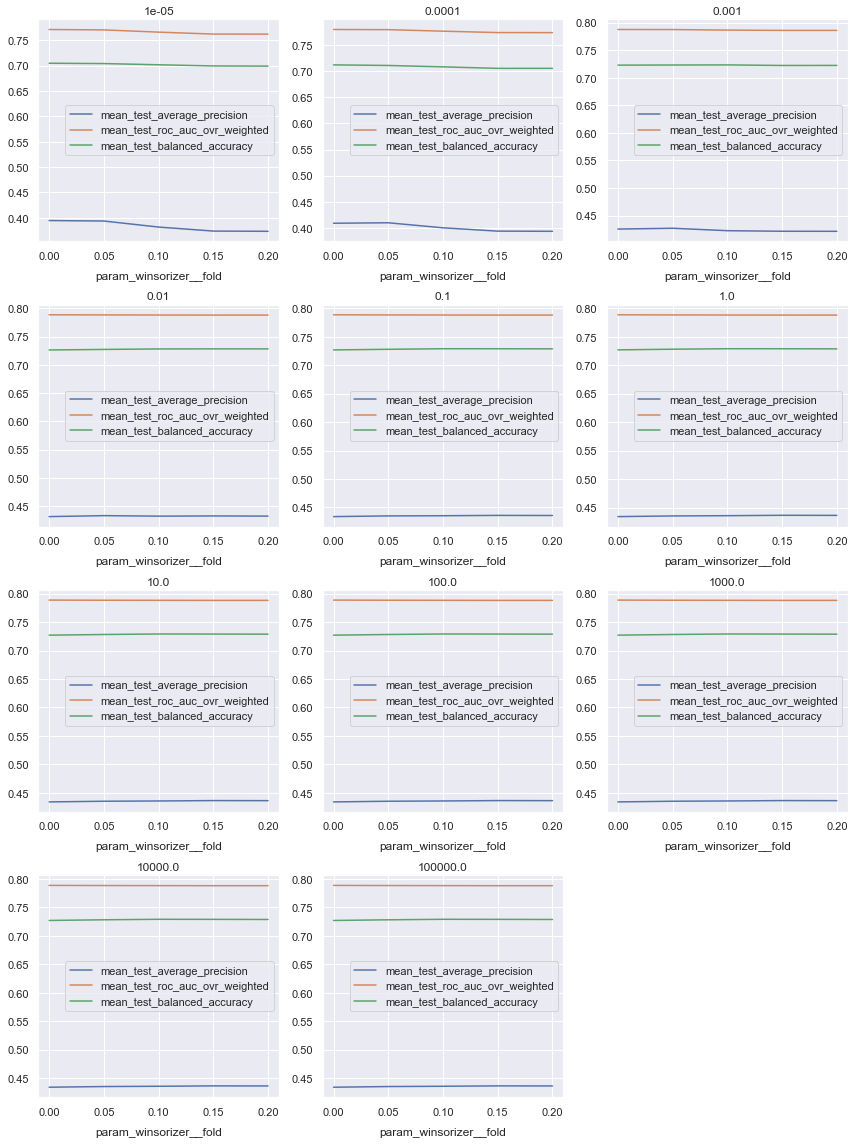

In [61]:
plotting.grouper_plot(data=results,
                      grouper="param_classifier__C",
                      x="param_winsorizer__fold",
                      y=scores);

#### C-value Scores at Different Winsorization Thresholds
Looks like strong regularization doesn't improve the model, and the scores plateau over $10^{-3}$.

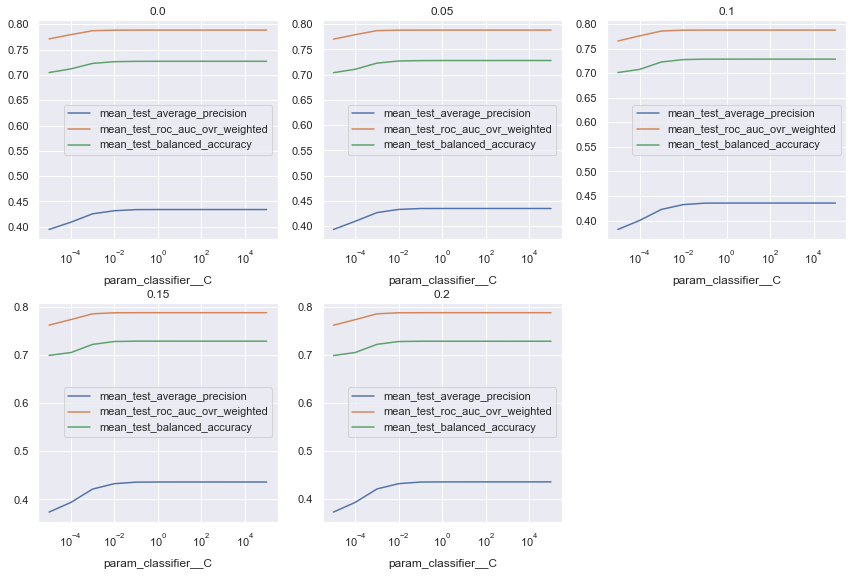

In [62]:
fig = plotting.grouper_plot(data=results,
                      x="param_classifier__C",
                      grouper="param_winsorizer__fold",
                      y=scores);
for ax in fig.get_axes():
    ax.set_xscale("log")

### Train and Test



The grid search results indicate that average precision drops when C (inverse of regularization strength) is under $10^{-3}$ and that $0.05$ is the best Winsorization setting. I set the regularization to $10^{-3}$ because it slightly increases positive recall without lowering the other scores too much. Look at that diagonal!

,0.0,1.0,macro avg,weighted avg,accuracy,bal accuracy
precision,0.953,0.241,0.597,0.876,0.725,0.718
recall,0.727,0.709,0.718,0.725,,
f1-score,0.825,0.360,0.592,0.775,,
support,0.891,0.109,,,,


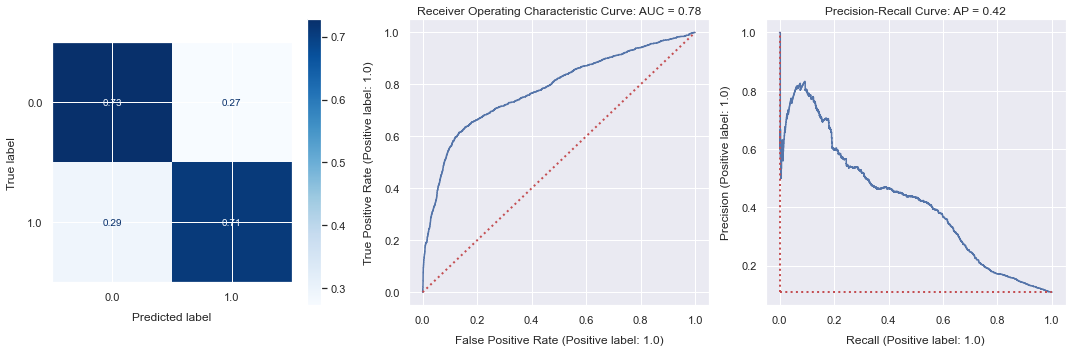

In [63]:
logit.set_params(warm_start=False, penalty="l2", C=1e-3)
classifier_pipe.fit(X_train, y_train)
diagnostics.standard_report(classifier_pipe, X_test, y_test)

### Retrain
Now that I've landed on a final set of preprocessors and parameters, I retrain the model on the whole dataset and save it.

In [64]:
classifier_pipe.fit(X, y)
joblib.dump(classifier_pipe, normpath("models/final_model.joblib"))

['models\\final_model.joblib']

# Interpretation
Now to see which features are most important for prediction. These features and the strengths of their relationships with the target variable will be crucial information for marketing managers at Banco de Portugal.

First I gather the feature names from my `DummyEncoder` and subtract the ones
dropped due to collinearity.

In [65]:
feat_names = classifier_pipe["cat_encoder"].feature_names_.tolist()
for name in classifier_pipe["corr_trimmer"].features_to_drop_:
    print(f"'{name}' was dropped")
    feat_names.remove(name)
feat_names

'emp_var_rate' was dropped
'euribor_3m' was dropped
'prev_failure' was dropped
'recent_prev_contact' was dropped


['age',
 'housing',
 'loan',
 'contact_count',
 'cons_price_idx',
 'cons_conf_idx',
 'n_employed',
 'prev_success',
 'prev_contact',
 'contact_cellular',
 'job_blue_collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self_employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'marital_single',
 'education_basic_6y',
 'education_basic_9y',
 'education_high_school',
 'education_professional_course',
 'education_university_degree',
 'contact_month_apr',
 'contact_month_may',
 'contact_month_jun',
 'contact_month_jul',
 'contact_month_aug',
 'contact_month_sep',
 'contact_month_oct',
 'contact_month_nov',
 'contact_weekday_tue',
 'contact_weekday_wed',
 'contact_weekday_thu',
 'contact_weekday_fri']

Then I grab the coefficients and put them alongside their names.

In [66]:
coef = pd.DataFrame(logit.coef_.T,
                    columns=["coef"],
                    index=feat_names).squeeze().copy()
coef.sort_values().head()

n_employed          -0.624925
contact_month_may   -0.288584
contact_month_nov   -0.090774
prev_contact        -0.081297
contact_month_aug   -0.064637
Name: coef, dtype: float64

Then I slice out the larger ones and plot them.

[Text(0.5, 1.0, 'Final Model Coefficients'), Text(0.5, 0, 'Coefficient')]

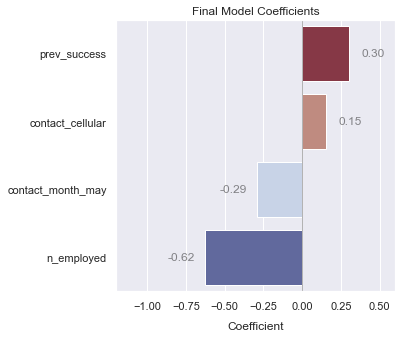

In [67]:
# Slice out only the large coefficients;
# L2 regularization crushed most of them
major_coef = coef.loc[coef.abs() >= .1].copy()

# Plot heated bars
ax = plotting.heated_barplot(data=major_coef,
                             figsize=(5, 5))
plotting.annot_bars(ax, dist=.25)
ax.set_xlim(-1.2, .6)
ax.set(title="Final Model Coefficients", xlabel="Coefficient",)

## Positive Coefficients
The largest positive coefficient is 'prev_success', which is hardly surprising. Clients who previously invested in accounts because of the bank's marketing campaigns are likely to invest again. This is common sense, but it's good to see that the model aligns with common sense.

The second largest positive coefficient is 'contact_cellular', meaning that calling the client on a cell phone increases the probability of investment. Why? I don't know. Maybe people are more likely to take these calls on their cell phones than when they're at home with their families. Or perhaps it has to do with what kind of people used cell phones rather than landlines in 2008-2010. It's about half the magnitude of 'prev_success', indicating that it has a weaker relationship. That also comports with common sense.

[Text(73.125, 0.5, 'Conversion Rate')]

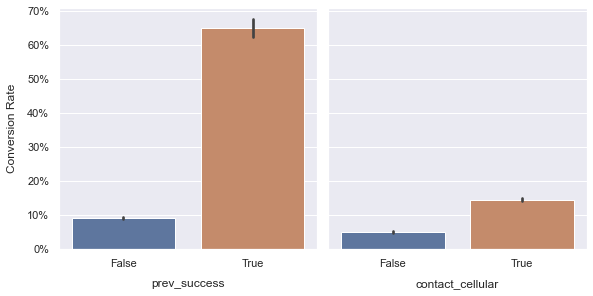

In [68]:
# Convert binary float variables to bool for plotting
df[utils.binary_cols(df)] = df.loc[:, utils.binary_cols].astype(np.bool_)

# Plot conversion rates for positive coeff features
fig = plotting.multi_rel(data=df,
                         x=["prev_success", "contact_cellular"],
                         y="invested",
                         kind="bar",
                         size=(4, 4))

# Format mean as percent
axs = fig.get_axes()
axs[0].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
axs[0].set(ylabel="Conversion Rate")

Well, even retirees were using cell phones apparently. I don't know why it's related to investing. Perhaps just because it's more popular?

[Text(0, 0.5, ''), Text(0.5, 0, 'Count'), Text(0.5, 1.0, 'Phone Type by Job')]

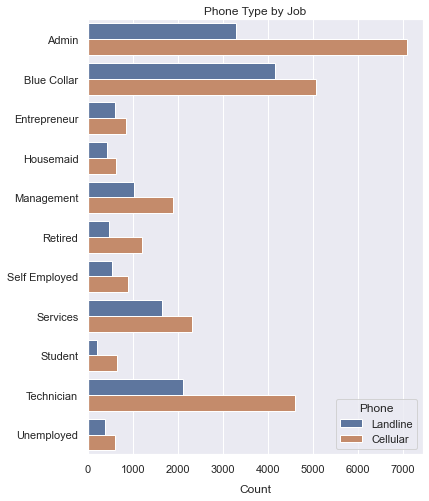

In [69]:
# Create special title-formatted DataFrame
cell_df = utils.title_mode(df)
cell_df["Phone"] = cell_df["Contact Cellular"].map(
    lambda x: "Cellular" if x else "Landline")

# Make the graph
fig, ax = plt.subplots(figsize=(6, 8))
sns.countplot(data=cell_df, y="Job", hue="Phone", ax=ax)
ax.set(ylabel=None, xlabel="Count", title="Phone Type by Job")
# del cell_df

>It is certainly more popular.

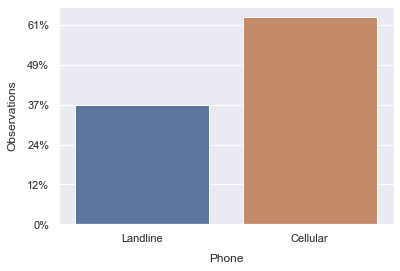

In [70]:
ax = sns.countplot(data=cell_df, x="Phone")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=cell_df.shape[0]))
ax.set(ylabel="Observations")
del cell_df

## Negative Coefficients
The largest negative coefficient (in magnitude)&mdash;and the largest coefficient of all by far&mdash;is 'n_employed'. This is a quarterly measure of how many people are employed in Portugal, in thousands. Its magnitude of 0.62 is more than twice that of 'prev_success' at 0.3. It's also over twice as important as 'contact_month_may', which is 0.29. Apparently May is just a terrible month for getting people to invest in term deposits. Or at least it was in 2008, 2009, and 2010.

As you can see from the graph below, the employment count has a clear negative relationship with the bank's conversion rate. What's unclear to me is why. Does employment decrease because of increased investment? That doesn't seem plausible, although I'm no economist. Do people invest while unemployed, or when the economy is slow? That doesn't seem plausible either.

[Text(0, 0.5, 'Conversion Rate'),
 Text(0.5, 0, 'Employment Count'),
 Text(0.5, 1.0, 'Conversion Rate by Portuguese Employment Count')]

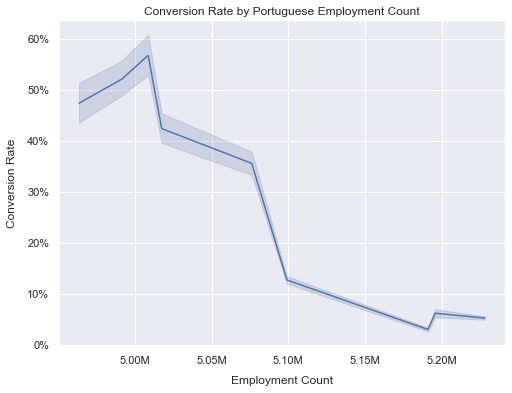

In [71]:
# Create special plotting DataFrame
neg_df = utils.title_mode(df)
neg_df["N Employed"] *= 1000

# Create Axes
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data=neg_df, x="N Employed", y="Invested", ax=ax)

# Format and label
ax.xaxis.set_major_formatter(plotting.big_number_formatter(2))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.set(ylabel="Conversion Rate",
       xlabel="Employment Count",
       title="Conversion Rate by Portuguese Employment Count")

No, unemployed people don't invest a lot. And that makes sense, seeing as they probably don't have a lot of extra money laying around. It's surprising that they invest at all, actually. 14% conversion is not bad for people who don't have disposable income. Maybe these are more like Paris Hilton types.

Anyway, regardless of *why* employment is inversely related to investment conversions, we can be certain that it is related in this way. The bank should invest more in marketing when employment is low.

In [72]:
df.query("job == 'unemployed'")["invested"].value_counts(1)

False    0.861554
True     0.138446
Name: invested, dtype: float64

The poor conversion for the month of May is similarly mysterious. Recall the figure below, reproduced from the exploration setting. Interestingly, May has the most total sales despite having the lowest conversion rate. This must mean that there are a LOT of observations in May.

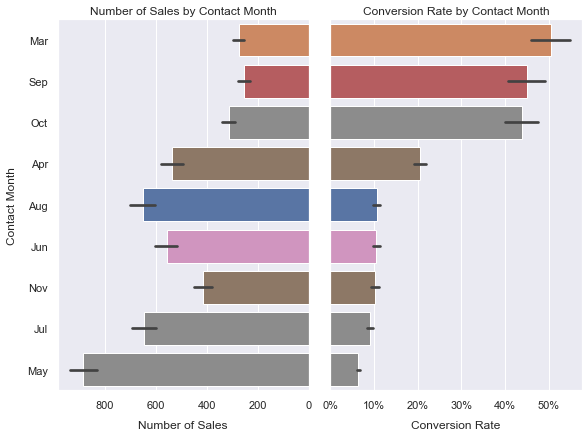

In [73]:
conversion_bars(data=df, y="contact_month", size=(4, 6));

Yep, for whatever reason, May has nearly 14,000 observations while the top 3 conversion rate months have observation counts in the hundreds.

Why are these categories so uneven, I wonder? Perhaps it has something to do with the fact that the top 4 highest observation count months are in the summer. Does the bank just spend more on marketing in the summer? Or is this just a very uneven sample of a larger dataset held by the bank? I don't know.

Anyway, the data clearly indicates that May is a very bad month for conversion efficiency.

In [74]:
df["contact_month"].value_counts()

may    13764
jul     7164
aug     6171
jun     5318
nov     4097
apr     2629
oct      717
sep      570
mar      546
Name: contact_month, dtype: int64

# Recommendations

#### When employment is low, spend more resources on marketing the investment product.
There is a very strong relationship between low employment and investment, although the true nature of the relationship remains a mystery.
#### Do not spend resources on marketing in May.
May is a strikingly bad month for conversion efficiency. It had the most total sales, but the worst ratio.
#### Prioritize clients who have previously invested as a result of marketing efforts.
This is probably already something you're doing, but rest assured that it works.
#### Prioritize cellular clients.
Clients who use a cell phone are more likely to invest than those who use a landline.

# Future Work
The most important future work would be to build different types of models and compare them to my final `LogisticRegression`. `RandomForestClassifier`, `LinearSVC`, and `KNeighborsClassifier` are three obvious choices. Unlike most support vector machines, the `LinearSVC` is able to handle datasets with large numbers of observations. But as it is a linear model, I still have to worry about multicollinearity.

Multicollinearity is not a concern, however, with the `RandomForestClassifier` or the `KNeighborsClassifier`. That means no features have to be dropped on that account. This alone is reason to think one of these models could perform better than my regression.  Of all of these, I see the most potential in the `RandomForestClassifier`, in part because it has so many hyperparameters to tune.

- 